# Convolution

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Convolution of two discrete signals

Given two discrete rectangual signals $g[k]$ and $h[k]$


Text(0, 0.5, '$h[k]\\rightarrow$')

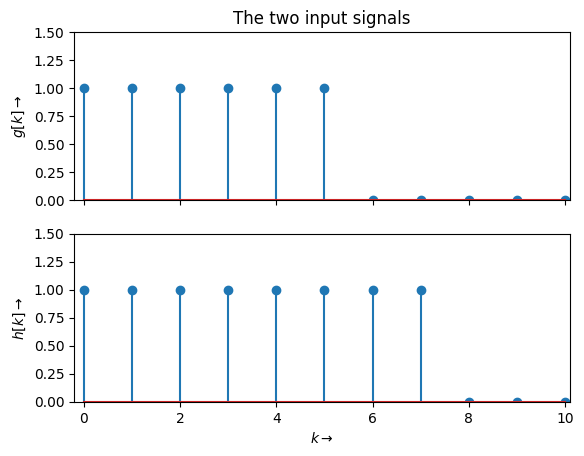

In [2]:
k = np.arange(11)
g = np.vectorize(lambda k: 1 if k < 6 else 0)
h = np.vectorize(lambda k: 1 if k < 8 else 0)

_, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
ax[0].stem(k, g(k))
ax[0].set_ylabel('$g[k]\\rightarrow$')
ax[0].set_title('The two input signals')
ax[0].set_xlim(left=-.2, right=10.1)
ax[0].set_ylim(bottom=0, top=1.5)
ax[1].stem(k, h(k))
ax[1].set_xlabel('$k\\rightarrow$')
ax[1].set_ylabel('$h[k]\\rightarrow$')

The convolution of these two discrete signals is calculated as

$$y[k] = g[k] \ast h[k] = \sum\limits_{k = -\infty}^{+\infty} g[\kappa]\cdot h[k-\kappa]$$

In Python the convolutional sum can be easily calculated using the `conv()` method. According to this definition of the length of the output vector of `conv()` is `len(g)+len(h)-1`.



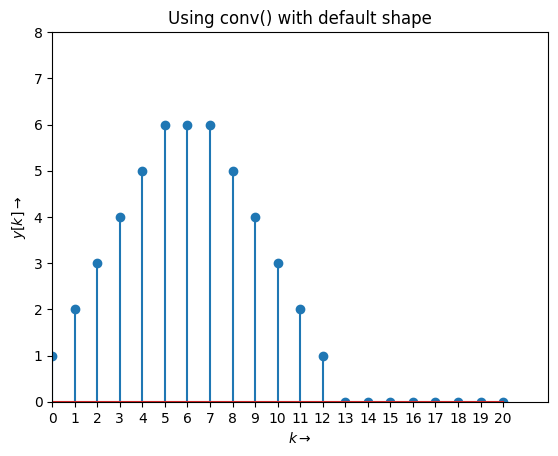

In [3]:
y = np.convolve(g(k), h(k))

plt.stem(np.arange(2*len(k)-1), y)
plt.xlabel('$k\\rightarrow$')
plt.ylabel('$y[k]\\rightarrow$')
plt.title('Using conv() with default shape')
plt.axis([0, 2*len(k), 0, 8])
plt.xticks(np.arange(2*len(k)-1));

In some situations it is desirable that the length of the output signal is limited to the length of one of the input signals (e.g. the first one). This can be achieved by setting the `mode` property of the `conv()` method to 'same'. This property only works when `len(g) > len(h)`.

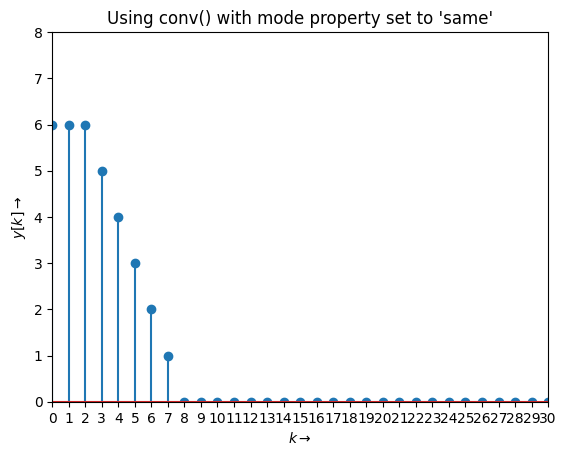

In [4]:
kg = np.arange(31)
kh = np.arange(11)
g_ = g(kg)
h_ = h(kh)
y = np.convolve(g_, h_, mode='same')
ky = np.arange(len(g_))

plt.stem(ky, y)
plt.xlabel('$k\\rightarrow$')
plt.ylabel('$y[k]\\rightarrow$')
plt.title("Using conv() with mode property set to 'same'")
plt.axis([0, ky[-1], 0, 8])
plt.xticks(ky);

In order to only calculate the convolution of the overlapped region of the two signals, the `mode` property can be set to `'valid'`. This may be especially useful if the second signal has minimum length (which would be seven in our example).

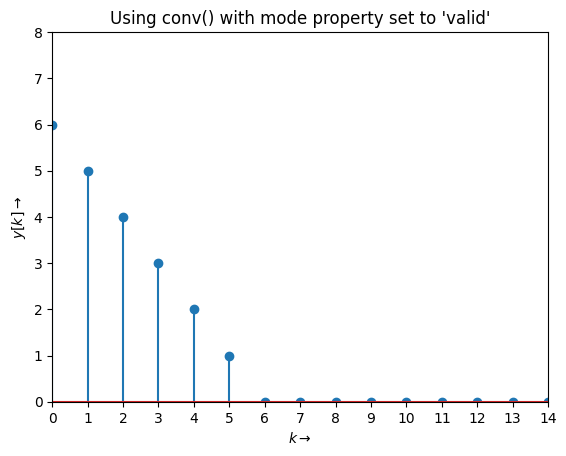

In [5]:
kg = np.arange(21)
kh = np.arange(7)
g_ = g(kg)
h_ = h(kh)

y = np.convolve(g_, h_, mode='valid')
ky = np.arange(len(g_)-len(h_)+1)

plt.stem(ky, y)
plt.xlabel('$k\\rightarrow$')
plt.ylabel('$y[k]\\rightarrow$')
plt.title("Using conv() with mode property set to 'valid'")
plt.axis([0, ky[-1], 0, 8])
plt.xticks(ky);

Please note, we use the convolution method of the `numpy` package here. There is also a convolution method in the `scipy.signal` package, which has some advantages in terms of execution performance.

## Approximate the convolution of two continuous-time signals

The calculation of the convolution of two continuous-time signals is not possible with a tool like Python/Numpy. However, it is possible to approximate the result by using sampled versions of the respective input signals.

### Convolution of two rectangular signals

As a first example, we consider the two rectangular signals $g(t)$ and $h(t)$ with

$$g(t) = \mathrm{rect}\left(\frac{t}{16}\right) \qquad\text{and}\qquad h(t) = \mathrm{rect}\left(\frac{t-4}{8}\right)$$

Since we cannot implement these two signals in Python/Numpy, we have to consider sampled versions of them

The sampling period $T_\mathrm{s}$ has to be set properly, which could be $T_\mathrm{s}=10\cdot 10^{-3}$ in our case. In order to illustrate the influence of different definitions of the time axis, we define the function $g(t)$ for times between $-15\leq t \leq 20$ and $h(t)$ for times between $-5\leq t \leq 10$.

Text(0, 0.5, '$h(t)\\rightarrow$')

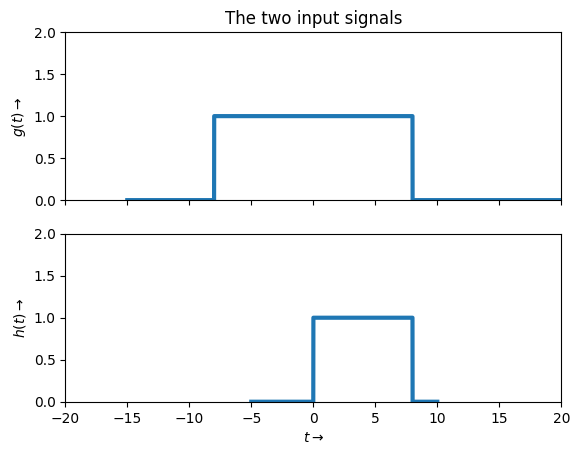

In [6]:
rect = np.vectorize(lambda t: np.abs(t)<=1/2, otypes=[np.float64])

Ts = 10e-3
tg = np.arange(-15, 20+Ts, Ts)
th = np.arange(-5, 10+Ts, Ts)

g = lambda t: rect(t/16)
h = lambda t: rect((t-4)/8)

_, ax = plt.subplots(nrows=2, sharex=True)
ax[0].plot(tg, g(tg), linewidth=3)
ax[0].set_ylim(0, 2)
ax[0].set_ylabel('$g(t)\\rightarrow$')
ax[0].set_title('The two input signals')
ax[1].plot(th, h(th), linewidth=3)
ax[1].set_xlim(-20, 20)
ax[1].set_ylim(0, 2)
ax[1].set_xlabel('$t\\rightarrow$')
ax[1].set_ylabel('$h(t)\\rightarrow$')

Now, we can calculate the convolution of the two continuous-time signals by approximating the convolution integral through the rectangle rule, which is in turn the convolution sum of the sampled versions of the respective signals:

$$y(t) = g(t)\ast h(t) = \int\limits_{-\infty}^{+\infty}g(\tau) \cdot h(t-\tau)\,\mathrm{d}\tau \approx  \sum\limits_{k = -\infty}^{+\infty} g[\kappa]\cdot h[k-\kappa] \cdot T_\mathrm{s} = y[k]\cdot T_\mathrm{s} = y(k\cdot T_\mathrm{s})$$

In [7]:
y = np.convolve(g(tg), h(th))*Ts

Now, the tricky part is to find the corresponding time vector for the resulting signal vector `y`. Since we use the `convolve()` method with `mode` property set to `'full'` (which is the default behavior) the minimum time sample of $y(t)$ is given by the minimum time sample of $g(t)$ shifted to the minimum time sample of $h(t)$ (in our case this is `th[0]-(-tg[0])`). The sampling period remains evidently $T_\mathrm{s}$. For the convolution, the signal $h(t)$ is shifted through the complete signal $g(t)$ which means the maximum time sample for $y(t)$ is given by

`th[0]+tg[0]+(tg[-1]-tg[0])+(th[-1]-th[0])=tg[-1]+th[-1]`.

In [8]:
ty = np.arange(th[0]+tg[0], tg[-1]+th[-1]+Ts, Ts)

Having the convolved signal `y` and the corresponding time vector `ty`, it is now possible to plot an approximation of the signal $y(t)$.

(0.0, 10.0)

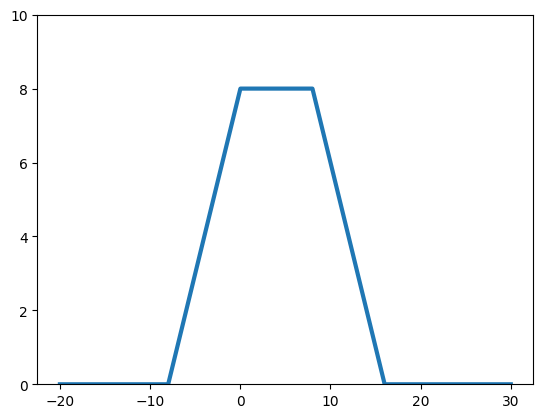

In [9]:
plt.plot(ty, y, linewidth=3)
plt.ylim(0, 10)

### Convolution of rectangular signal with dirac impulse

The convolution of a signal with a dirac impulse leads to a shift of the signal to the time position of the dirac impulse together with a multiplication of the weighting of the dirac. Implementing a convolution in Python/Numpy with a dirac needs special consideration. In our example we look again at the signal $h(t)$ from our example above and calculate the convolution with a dirac at time $t=5$.

$$z(t) = h(t) \ast \delta(t-5)$$

Before we can implement the dirac impulse in Python/Numpy we have to look at one of its mathematical definitions

$$\delta(t) = \lim_{T\to 0} \,\frac{\mathrm{rect}\left(1/T\right)}{T}$$

Using this definition the integral from over the dirac converges to one:

$$\int\limits_{-\infty}^{+\infty} \delta(t)\,\mathrm{d}t = 1$$

That means, the dirac impulse is a rectangluar impulse with infinite height and zero width. It is not feasible to implement such an impulse in Python/Numpy. However, we can approximate this impulse by an impulse with width of our sampling period $T_\mathrm{s}$ and the weighting height (in our case it would be one).

$$\delta(t) \approx \frac{\mathrm{rect}\left(1/T_\mathrm{s}\right)}{T_\mathrm{s}}$$

When using this definition, we have to be careful when plotting the dirac impulse. It is now necessary to multiply the dirac with the sampling time in order to show the correct weighting.

Text(0.5, 1.0, 'Dirac impulse $\\delta(t-5)$')

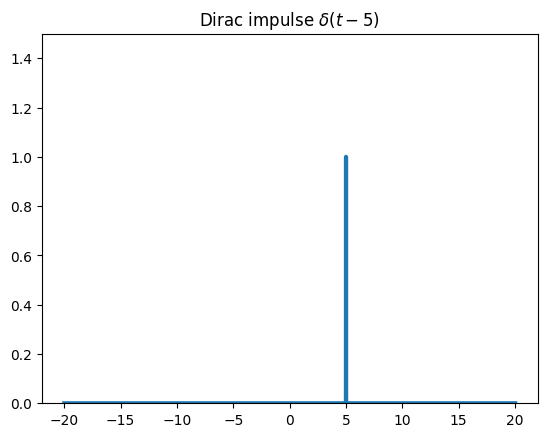

In [10]:
dirac = lambda t: rect(t/Ts)/Ts
d5 = lambda t: dirac(t-5)
td5 = np.arange(-20, 20+Ts, Ts)

plt.plot(td5, d5(td5)*Ts, linewidth=3)
plt.ylim(0, 1.5)
plt.title('Dirac impulse $\\delta(t-5)$')

The calculation of the convolution $z(t)$ is now done in the same way as described above.

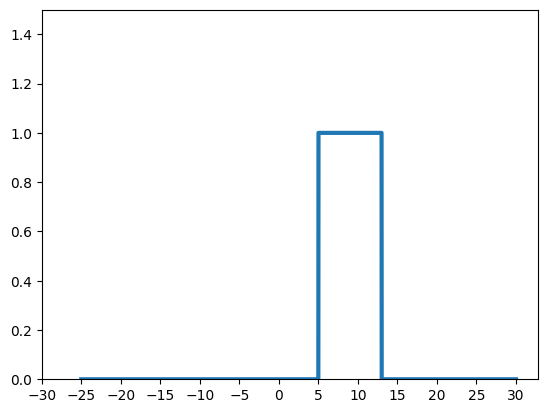

In [11]:
z = np.convolve(h(th), d5(td5))*Ts
tz = np.arange(th[0]+td5[0], th[-1]+td5[-1], Ts);

plt.plot(tz, z, linewidth=3)
plt.ylim(0, 1.5)
plt.xticks(np.arange(-30, 35, 5));